In [9]:
import pandas as pd
import numpy as np
def summation_unit(inputs,weights):
    return np.dot(inputs,weights)
def step_acti(x):
    return 1 if x>=0 else 0
def bipol_acti(x):
    return 1 if x>=0 else -1
def sigmoid_acti(x):
    return 1/(1+np.exp(-x))
def tanh_acti(x):
    return np.tanh(x)
def relu_acti(x):
    return max(0,x)
def leaky_relu_acti(x):
    return x if x>0 else 0.01*x
def error_compare(target, output):
    return target-output
    

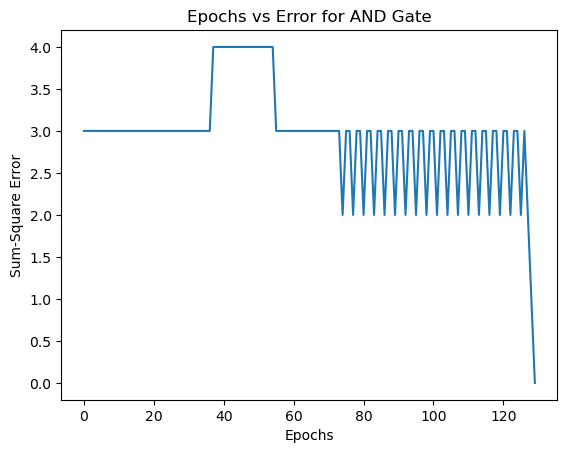

In [2]:
#A2:


weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Training Data for AND Gate
training_data = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

targets = np.array([0, 0, 0, 1])
errors = []
epochs = 0

# Training Loop
for _ in range(1000):
    total_error = 0
    for i in range(len(training_data)):
        inputs = training_data[i]
        target = targets[i]
        
        summation = summation_unit(inputs, weights)
        output = step_acti(summation)
        error = error_compare(target, output)
        
        weights += learning_rate * error * inputs
        total_error += error**2
        
    errors.append(total_error)
    epochs += 1
    
    if total_error <= 0.002:
        break

# Plotting Epochs vs Error
import matplotlib.pyplot as plt
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs Error for AND Gate')
plt.show()


Activation Function: bipol_acti
Final Weights: [ 0.2   0.1  -0.15]
Total Epochs: 1000
----------
Activation Function: sigmoid_acti
Final Weights: [ 5.3005861   5.08352114 -7.96717859]
Total Epochs: 1000
----------
Activation Function: relu_acti
Final Weights: [ 5.39229588  0.94224782 -5.35770412]
Total Epochs: 167
----------


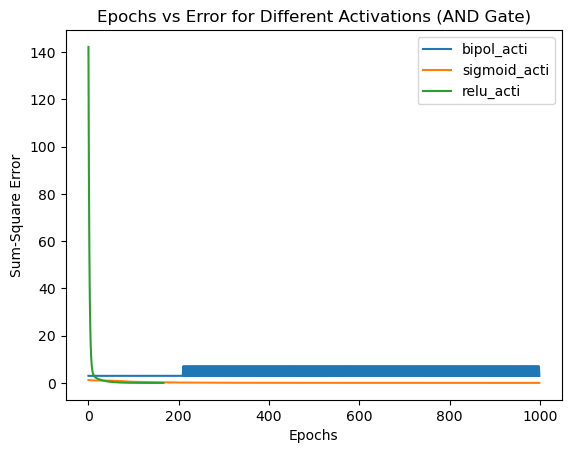

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the required functions exist: summation_unit, error_compare, activation functions
def train_perceptron(activation_function, weights, learning_rate, training_data, targets):
    errors = []
    epochs = 0

    for _ in range(1000):  # Maximum number of epochs
        total_error = 0
        for i in range(len(training_data)):
            # Add bias input (1) to the input data
            inputs = np.append(training_data[i], 1)
            target = targets[i]

            # Summation (dot product of inputs and weights)
            summation = np.dot(inputs, weights)
            # Apply activation function
            output = activation_function(summation)
            # Calculate error (difference between target and predicted output)
            error = target - output

            # Update weights using the perceptron learning rule
            weights += learning_rate * error * inputs
            # Accumulate the squared error
            total_error += error**2

        errors.append(total_error)
        epochs += 1

        # Stop if the error is below a threshold
        if total_error <= 0.002:
            break

    return epochs, errors, weights

# Example activation functions
def bipol_acti(x):
    return 1 if x >= 0 else -1

def sigmoid_acti(x):
    return 1 / (1 + np.exp(-x))

def relu_acti(x):
    return max(0, x)

# Training data for AND gate
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Initial weights (including bias weight)
initial_weights = np.array([10, 0.2, -0.75])

# Comparing with Bi-Polar Step, Sigmoid, and ReLU activation functions
activation_functions = [bipol_acti, sigmoid_acti, relu_acti]

for activation_function in activation_functions:
    epochs, errors, final_weights = train_perceptron(activation_function, initial_weights.copy(), 0.05, training_data, targets)
    
    # Plotting
    plt.plot(range(epochs), errors, label=activation_function.__name__)
    
    # Printing the final weights and epochs
    print(f"Activation Function: {activation_function.__name__}")
    print(f"Final Weights: {final_weights}")
    print(f"Total Epochs: {epochs}")
    print("----------")

# Plot settings
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs Error for Different Activations (AND Gate)')
plt.legend()
plt.show()


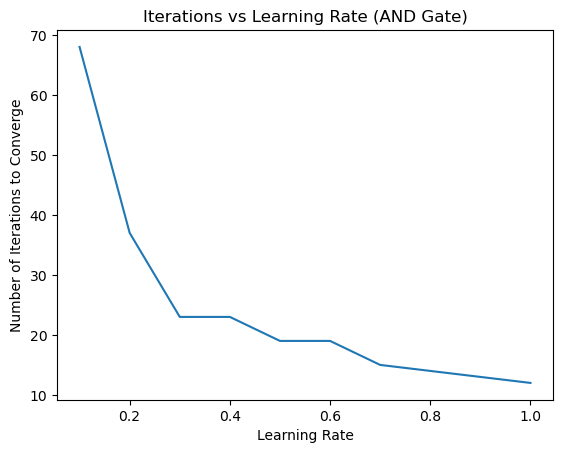

In [5]:
#A4:

learning_rates = [0.1 * i for i in range(1, 11)]
iterations = []

for lr in learning_rates:
    _, errors = train_perceptron(step_acti, np.array([10, 0.2, -0.75]), lr, training_data, targets)
    iterations.append(len(errors))

plt.plot(learning_rates, iterations)
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Iterations vs Learning Rate (AND Gate)')
plt.show()


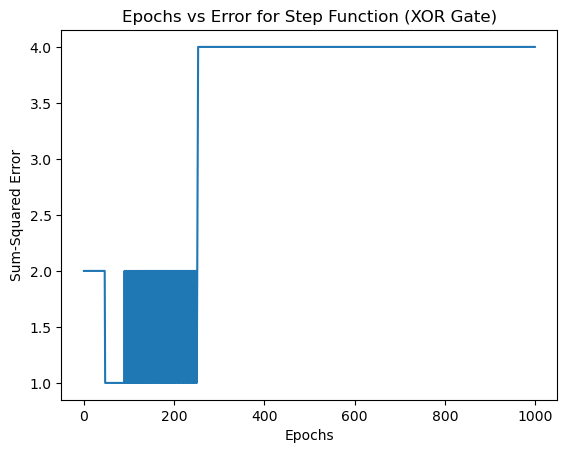

In [7]:
#A5:



# XOR gate logic inputs and targets
training_data_xor = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

targets_xor = np.array([0, 1, 1, 0])

# Train and plot for XOR with Step function
epochs_xor, errors_xor = train_perceptron(step_acti, np.array([10, 0.2, -0.75]), 0.05, training_data_xor, targets_xor)

plt.plot(range(epochs_xor), errors_xor)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Epochs vs Error for Step Function (XOR Gate)')
plt.show()


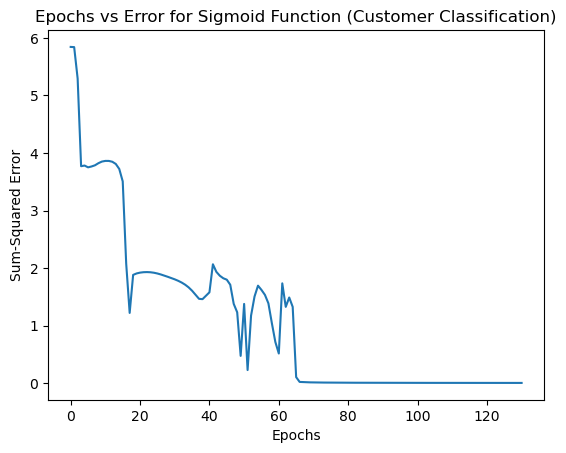

In [8]:
# Customer data and targets
customer_data = np.array([
    [1, 20, 6, 2],
    [1, 16, 3, 6],
    [1, 27, 6, 2],
    [1, 19, 1, 2],
    [1, 24, 4, 2],
    [1, 22, 1, 5],
    [1, 15, 4, 2],
    [1, 18, 4, 2],
    [1, 21, 1, 4],
    [1, 16, 2, 4]
])

targets_customer = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Train and plot for Customer Classification with Sigmoid function
epochs_customer, errors_customer = train_perceptron(sigmoid_acti, np.array([0.5, -0.5, 0.5, -0.5]), 0.05, customer_data, targets_customer)
#plotting
plt.plot(range(epochs_customer), errors_customer)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Epochs vs Error for Sigmoid Function (Customer Classification)')
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Perceptron training function
def train_perceptron(activation_function, weights, learning_rate, training_data, targets):
    errors = []
    epochs = 0

    for _ in range(1000):  # Maximum number of epochs
        total_error = 0
        for i in range(len(training_data)):
            # Add bias input (1) to the input data
            inputs = np.append(training_data[i], 1)
            target = targets[i]

            # Summation (dot product of inputs and weights)
            summation = np.dot(inputs, weights)
            # Apply activation function
            output = activation_function(summation)
            # Calculate error (difference between target and predicted output)
            error = target - output

            # Update weights using the perceptron learning rule
            weights += learning_rate * error * inputs
            # Accumulate the squared error
            total_error += error**2

        errors.append(total_error)
        epochs += 1

        # Stop if the error is below a threshold
        if total_error <= 0.002:
            break

    return epochs, errors, weights

# Activation functions
def step_function(x):
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# Training data for AND gate
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Initial weights (including bias weight)
initial_weights = np.array([10, 0.2, -0.75])

# List to store results for the table
results = []

# Defining the list of activation functions to compare
activation_functions = [
    (step_function, "Step Function"),
    (bipolar_step_function, "Bipolar Step Function"),
    (sigmoid, "Sigmoid"),
    (relu, "ReLU")
]

# Training perceptron with each activation function and collect results
for activation_function, name in activation_functions:
    epochs, errors, final_weights = train_perceptron(activation_function, initial_weights.copy(), 0.05, training_data, targets)
    
    
    # Collecting the final values for the table
    final_error = errors[-1]
    results.append([name, epochs, final_error])

# Creating a DataFrame to display the results as a table
df_results = pd.DataFrame(results, columns=['Activation Function', 'Epochs to Converge', 'Final Error'])
print(df_results)




     Activation Function  Epochs to Converge  Final Error
0          Step Function                  94     0.000000
1  Bipolar Step Function                1000     3.000000
2                Sigmoid                1000     0.013875
3                   ReLU                 167     0.001996


In [6]:
#A7:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Customer transaction dataset (same as A6)
data = pd.DataFrame({
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'High_Value': [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
})

# Extract input features and targets
training_data = data[['Candies', 'Mangoes', 'Milk']].values
targets = data['High_Value'].values

# Add bias term to the input data
X = np.c_[training_data, np.ones(training_data.shape[0])]  # Append bias (column of ones)
Y = targets.reshape(-1, 1)  # Targets reshaped as a column vector

# Matrix pseudo-inverse method
X_pseudo_inverse = np.linalg.pinv(X)
weights_pseudo_inverse = np.dot(X_pseudo_inverse, Y)

print(f"Weights using pseudo-inverse method:\n{weights_pseudo_inverse.flatten()}")

# Compare with the perceptron learning (from A6)
# Perceptron training function (sigmoid-based)
def sigmoid_acti(x):
    return 1 / (1 + np.exp(-x))

def error_compare(target, output):
    return target - output

def train_perceptron_sigmoid(weights, learning_rate, training_data, targets, max_epochs=1000, threshold=0.002):
    errors = []
    epochs = 0

    for _ in range(max_epochs):
        total_error = 0
        for i in range(len(training_data)):
            inputs = np.append(training_data[i], 1)  # Add bias input
            target = targets[i]

            # Summation (dot product of inputs and weights)
            summation = np.dot(inputs, weights)
            # Apply sigmoid activation function
            output = sigmoid_acti(summation)
            # Calculate error
            error = error_compare(target, output)

            # Update weights
            weights += learning_rate * error * inputs
            # Accumulate squared error
            total_error += error**2

        errors.append(total_error)
        epochs += 1

        # Stop if the error is below the threshold
        if total_error <= threshold:
            break

    return epochs, errors, weights

# Initial weights (including bias weight)
initial_weights = np.random.randn(training_data.shape[1] + 1)  # 3 inputs + 1 bias
learning_rate = 0.05

# Train perceptron using sigmoid activation
epochs, errors, final_weights = train_perceptron_sigmoid(initial_weights.copy(), learning_rate, training_data, targets)

# Print final weights and epochs
print(f"Final Weights using Perceptron Learning:\n{final_weights}")
print(f"Total Epochs to Converge: {epochs}")


Weights using pseudo-inverse method:
[-0.02342675  0.2607237   0.03727212  0.1139903 ]
Final Weights using Perceptron Learning:
[-1.29808014  8.78426346 -0.13322709 -0.01503248]
Total Epochs to Converge: 124


Final Weights: [1.84393701 1.86337426]
Final Bias: [-2.93104255]
Total Epochs to Converge: 1000


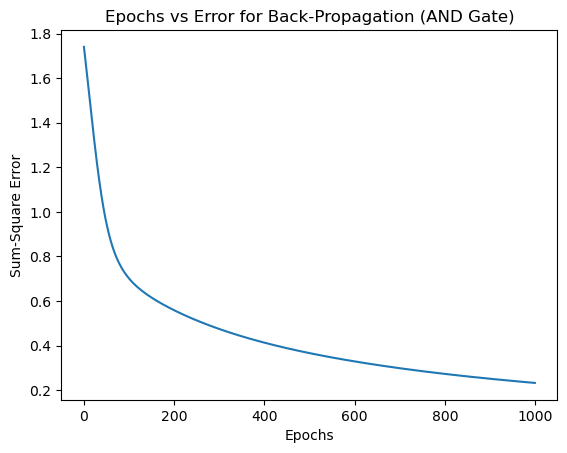

Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative for backpropagation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# AND gate training data
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [0], [0], [1]])

# Initialize weights and bias
np.random.seed(42)  # For reproducibility
weights = np.random.rand(2, 1)  # Weights for 2 inputs and 1 output neuron
bias = np.random.rand(1)        # Bias for the output neuron

# Learning rate
learning_rate = 0.05

# Function to train the neural network using back-propagation
def train_neural_network(training_data, targets, weights, bias, learning_rate, max_epochs=1000, threshold=0.002):
    errors = []
    epochs = 0

    for _ in range(max_epochs):
        total_error = 0
        for i in range(len(training_data)):
            inputs = training_data[i]
            target = targets[i]

            # Forward propagation
            weighted_sum = np.dot(inputs, weights) + bias
            output = sigmoid(weighted_sum)

            # Error calculation
            error = target - output
            total_error += np.sum(error**2)

            # Backward propagation
            d_output = error * sigmoid_derivative(output)  # Derivative of sigmoid function

            # Update weights and bias (element-wise multiplication for scalar d_output)
            weights += learning_rate * inputs.reshape(-1, 1) * d_output
            bias += learning_rate * d_output

        errors.append(total_error)
        epochs += 1

        # Stop if the error is below the threshold
        if total_error <= threshold:
            break

    return epochs, errors, weights, bias

# Train the neural network
epochs, errors, final_weights, final_bias = train_neural_network(training_data, targets, weights, bias, learning_rate)

# Print final weights, bias, and number of epochs
print(f"Final Weights: {final_weights.flatten()}")
print(f"Final Bias: {final_bias}")
print(f"Total Epochs to Converge: {epochs}")

# Plot errors over epochs
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs Error for Back-Propagation (AND Gate)')
plt.show()

# Test the network on the AND gate
def test_neural_network(inputs, weights, bias):
    weighted_sum = np.dot(inputs, weights) + bias
    output = sigmoid(weighted_sum)
    return 1 if output >= 0.5 else 0  # Binary threshold at 0.5

# Testing the trained network
for inputs in training_data:
    output = test_neural_network(inputs, final_weights, final_bias)
    print(f"Input: {inputs}, Predicted Output: {output}")


Final Weights: [-0.11188012  0.01890218  0.02904129]
Total Epochs to Converge: 1000


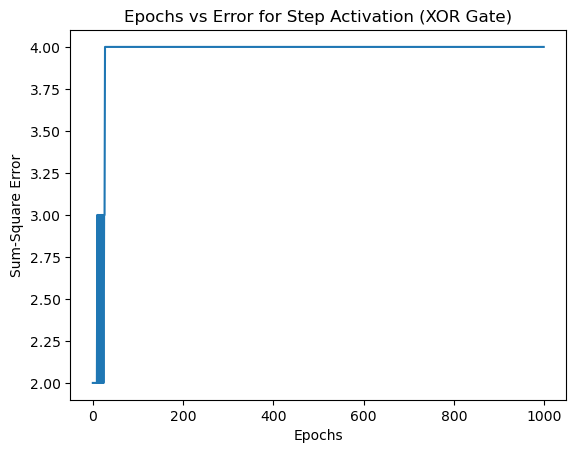

Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def step_function(x):
    return 1 if x >= 0 else 0

# Summation unit
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# Error comparator
def error_compare(target, output):
    return target - output

# Perceptron training function
def train_perceptron(activation_function, weights, learning_rate, training_data, targets, max_epochs=1000, threshold=0.002):
    errors = []
    epochs = 0

    for _ in range(max_epochs):
        total_error = 0
        for i in range(len(training_data)):
            inputs = np.append(training_data[i], 1)  # Add bias input
            target = targets[i]

            # Summation (dot product of inputs and weights)
            summation = summation_unit(inputs, weights)
            # Apply activation function
            output = activation_function(summation)
            # Calculate error
            error = error_compare(target, output)

            # Update weights using the perceptron learning rule
            weights += learning_rate * error * inputs
            # Accumulate squared error
            total_error += error**2

        errors.append(total_error)
        epochs += 1

        # Stop if the error is below the threshold
        if total_error <= threshold:
            break

    return epochs, errors, weights

# XOR gate training data
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])  # XOR outputs

# Initial weights (including bias weight)
initial_weights = np.random.randn(training_data.shape[1] + 1)  # 2 inputs + 1 bias

# Learning rate
learning_rate = 0.05

# Train perceptron using step activation function
epochs, errors, final_weights = train_perceptron(step_function, initial_weights.copy(), learning_rate, training_data, targets)

# Print final weights and number of epochs
print(f"Final Weights: {final_weights}")
print(f"Total Epochs to Converge: {epochs}")

# Plot errors over epochs
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs Error for Step Activation (XOR Gate)')
plt.show()

# Test the trained perceptron
def test_perceptron(inputs, weights):
    inputs = np.append(inputs, 1)  # Add bias input
    summation = summation_unit(inputs, weights)
    return step_function(summation)

# Testing the trained perceptron on XOR gate
for inputs in training_data:
    output = test_perceptron(inputs, final_weights)
    print(f"Input: {inputs}, Predicted Output: {output}")


Final Weights:
[[ 0.11051528 -0.08087813]
 [ 0.07483019 -0.02138017]
 [-0.07408284  0.03745099]]
Total Epochs to Converge: 1000


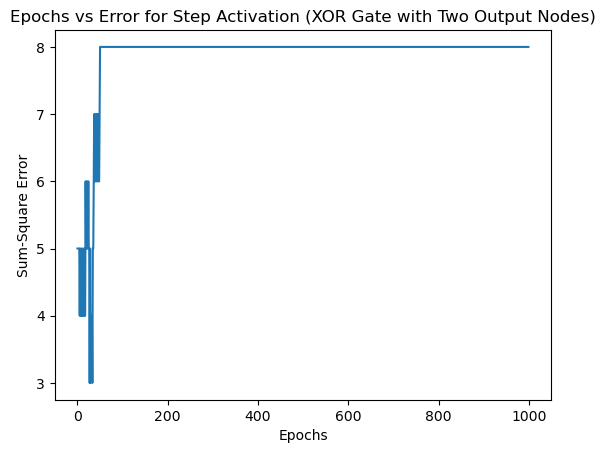

Input: [0 0], Predicted Output: [0 1]
Input: [0 1], Predicted Output: [1 1]
Input: [1 0], Predicted Output: [1 0]
Input: [1 1], Predicted Output: [1 0]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the step function
def step_function(x):
    return 1 if x >= 0 else 0

# Summation unit
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# Error comparator
def error_compare(target, output):
    return target - output

# Perceptron training function for multi-output
def train_perceptron_multi_output(activation_function, weights, learning_rate, training_data, targets, max_epochs=1000, threshold=0.002):
    errors = []
    epochs = 0

    for _ in range(max_epochs):
        total_error = 0
        for i in range(len(training_data)):
            inputs = np.append(training_data[i], 1)  # Add bias input
            target = targets[i]

            # Summation (dot product of inputs and weights for both outputs)
            summation = summation_unit(inputs, weights)
            # Apply activation function for each output node
            output = np.array([activation_function(summation[j]) for j in range(len(summation))])
            # Calculate error for both output nodes
            error = target - output

            # Update weights using the perceptron learning rule for each output node
            weights += learning_rate * np.outer(inputs, error)

            # Accumulate squared error
            total_error += np.sum(error**2)

        errors.append(total_error)
        epochs += 1

        # Stop if the total error is below the threshold
        if total_error <= threshold:
            break

    return epochs, errors, weights

# XOR gate training data
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Targets for XOR mapped to two output nodes: [O1, O2] = [1, 0] for 0, and [0, 1] for 1
targets = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

# Initial weights (including bias weight for each output neuron)
initial_weights = np.random.randn(training_data.shape[1] + 1, 2)  # 2 inputs + 1 bias, 2 output neurons

# Learning rate
learning_rate = 0.05

# Train perceptron with two output nodes using step activation function
epochs, errors, final_weights = train_perceptron_multi_output(step_function, initial_weights.copy(), learning_rate, training_data, targets)

# Print final weights and number of epochs
print(f"Final Weights:\n{final_weights}")
print(f"Total Epochs to Converge: {epochs}")

# Plot errors over epochs
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs Error for Step Activation (XOR Gate with Two Output Nodes)')
plt.show()

# Test the trained perceptron with two output nodes
def test_perceptron_multi_output(inputs, weights):
    inputs = np.append(inputs, 1)  # Add bias input
    summation = summation_unit(inputs, weights)
    return np.array([step_function(summation[j]) for j in range(len(summation))])

# Testing the trained perceptron on XOR gate
for inputs in training_data:
    output = test_perceptron_multi_output(inputs, final_weights)
    print(f"Input: {inputs}, Predicted Output: {output}")


AND Gate Predictions: [0 0 0 0]
XOR Gate Predictions: [0 0 0 0]


/Users/shreyamittal/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


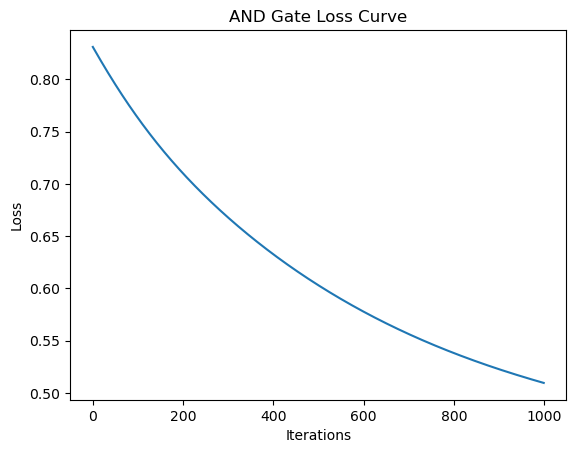

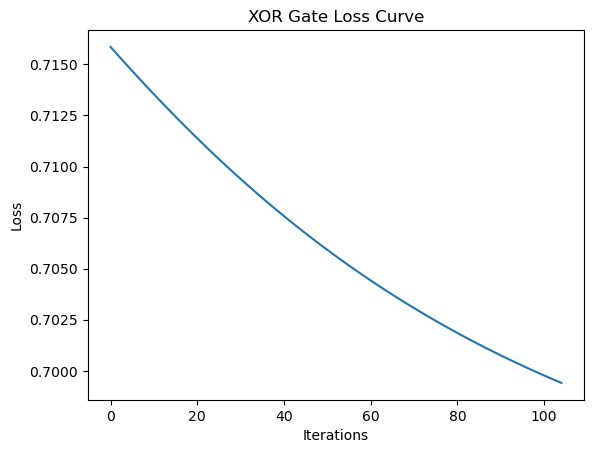

In [14]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Define the AND gate data
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_outputs = np.array([0, 0, 0, 1])  # AND gate logic

# Define the XOR gate data
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_outputs = np.array([0, 1, 1, 0])  # XOR gate logic

# Train MLP for AND gate with adam solver
and_mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=1000)
and_mlp.fit(and_inputs, and_outputs)

# Train MLP for XOR gate with adam solver
xor_mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=1000)
xor_mlp.fit(xor_inputs, xor_outputs)

# Test and print results for AND gate
print("AND Gate Predictions:", and_mlp.predict(and_inputs))

# Test and print results for XOR gate
print("XOR Gate Predictions:", xor_mlp.predict(xor_inputs))

# Plotting number of iterations vs error for AND Gate
plt.plot(and_mlp.loss_curve_)
plt.title('AND Gate Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Plotting number of iterations vs error for XOR Gate
plt.plot(xor_mlp.loss_curve_)
plt.title('XOR Gate Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading CSV data
file_path = "DCT_withoutduplicate 1.csv"  
df = pd.read_csv(file_path)

# Split data into features (X) and labels (y)
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as labels



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (MLPs work better with normalized/standardized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Accuracy vs Learning Rate for Different Hidden Layer Sizes
learning_rates = [0.001, 0.01, 0.05, 0.1]
hidden_layer_sizes = [(50,), (100,), (150,), (200,)]
accuracies = []

for lr in learning_rates:
    acc_per_layer_size = []
    for hl_size in hidden_layer_sizes:
        mlp_temp = MLPClassifier(hidden_layer_sizes=hl_size, activation='relu', solver='adam', learning_rate_init=lr, max_iter=1000)
        mlp_temp.fit(X_train, y_train)
        y_pred_temp = mlp_temp.predict(X_test)
        acc_per_layer_size.append(accuracy_score(y_test, y_pred_temp))
    accuracies.append(acc_per_layer_size)

# Plot accuracy vs learning rate for different hidden layer sizes
plt.figure(figsize=(10, 6))
for idx, hl_size in enumerate(hidden_layer_sizes):
    plt.plot(learning_rates, [accuracies[i][idx] for i in range(len(learning_rates))], label=f'Hidden Layer Size: {hl_size}')
    
plt.title('Accuracy vs Learning Rate for Different Hidden Layer Sizes')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'DCT_withoutduplicate 1.csv'